In [3]:
 %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [6]:
#CODE FROM: https://stackoverflow.com/questions/9506841/using-python-pil-to-turn-a-rgb-image-into-a-pure-black-and-white-image
from PIL import Image

def binarize_image(img_path, target_path, threshold=200):
    """Binarize an image."""
    image_file = Image.open(img_path)
    image = image_file.convert('L')  # convert image to monochrome
    image = np.array(image)
    image = binarize_array(image, threshold)
    return image
    #imsave(target_path, image)


def binarize_array(numpy_array, threshold=200):
    """Binarize a numpy array."""
    for i in range(len(numpy_array)):
        for j in range(len(numpy_array[0])):
            if numpy_array[i][j] > threshold:
                numpy_array[i][j] = 255
            else:
                numpy_array[i][j] = 0
    return numpy_array

In [15]:
pawn = binarize_image('new_pawn.jpg', None)
pawn = cv2.resize(pawn, (700, 700))
queen = binarize_image('new_queen.jpg', None)
queen = cv2.resize(queen, (700, 700))
rook = binarize_image('new_rook.jpg', None)
rook = cv2.resize(rook, (700, 700))
bishop = binarize_image('new_bishop.jpg', None)
bishop = cv2.resize(bishop, (700, 700))
board = plt.imread('new_board.jpg')
possible_pieces = [['pawn',pawn],['rook',rook], ['queen',queen], ['bishop',bishop]]
# edges = cv2.Canny(img, 100,200)

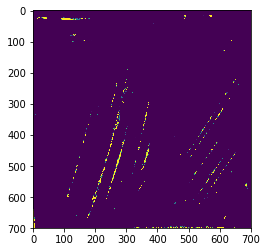

In [19]:
plt.imshow(pawn)

In [103]:
def find_closest_letter(input_image):
    least_squared_sum = np.inf
    piece = None
    for chess in possible_pieces:
        piece_name = chess[0]
        chess_piece = chess[1]
        squared_difference =  np.sum(np.square(input_image-chess_piece))
        if(squared_difference < least_squared_sum):
            least_squared_sum = squared_difference
            piece = piece_name
    return piece
    

In [104]:
print(find_closest_letter(bishop))

bishop


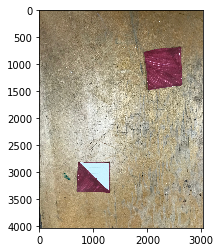

In [118]:
plt.imshow(Image.open('new_board.jpg'))

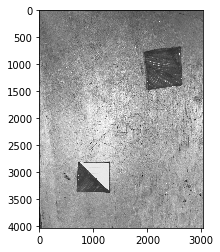

In [124]:
image_file = Image.open('new_board.jpg')
image = image_file.convert('L') 
plt.imshow(image)

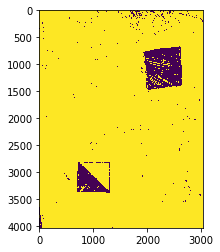

In [13]:
im = cv2.imread('new_board.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,90,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(img, contours, -1, (0,255,0), 3)
# cnt = contours[4]
# cv2.drawContours(img, [cnt], 0, (0,255,0), 3)
#answer = cv2.drawContours(img, contours, 0, (0,255,0), 3)
#plt.imshow(answer)
plt.imshow(thresh)
#plt.show()

In [11]:
plt.imshow(thresh)

NameError: name 'thresh' is not defined

In [23]:
new_board_creation = []
def check_neighbors(row, entry):
    check = []
    
    if(entry-1 >= 0):
        left = new_board[row][entry-1]
        if(left):
            check.append(True)
    if(row-1 >= 0):
        top = new_board[row-1][entry]
        if(top):
            check.append(True)
    if(row+1 < len(new_board)):
        bottom = new_board[row+1][entry]
        if(bottom):
            check.append(True)
    if(entry+1 < len(new_board[0])):
        right = new_board[row][entry+1]
        if(right):
            check.append(True)

for row in range(len(new_board)):
    new_row = []
    for entry in range(len(new_board[row])):
        test = new_board[row][entry]
        if(test > 0):
            if(check_neighbors(row, entry)):
                new_row.append(float(test))
        else:
            new_row.append(float(0))
    new_board_creation.append(new_row)
        

TypeError: Image data cannot be converted to float

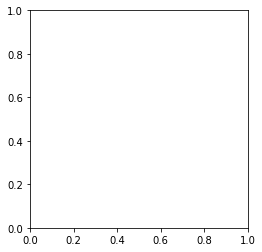

In [24]:
plt.imshow(np.array(new_board_creation))

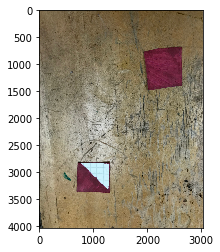

In [59]:
element = cv2.getStructuringElement(cv2.MORPH_RECT, (11,11))
mask = cv2.erode(board, element, iterations = 1)
mask = cv2.dilate(board, element, iterations = 1)
mask = cv2.erode(board, element)
plt.imshow(mask)



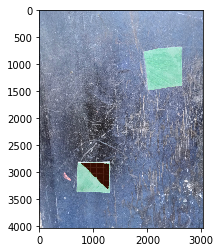

In [68]:
mask = cv2.bitwise_not(mask)
plt.imshow(mask)

In [4]:
image_file = Image.open("new_board.jpg")
image = image_file.convert('L')  # convert image to monochrome
plt.imshow(image)
# new_board = binarize_array(mask)
# plt.imshow(new_board)

NameError: name 'Image' is not defined

In [2]:
im = cv2.imread('new_board.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
photo = imgray.astype(np.uint8)
show()

NameError: name 'cv2' is not defined

In [84]:
#im = cv2.imread("blob.png", cv2.IMREAD_GRAYSCALE)
im = image

params = cv2.SimpleBlobDetector_Params()
# Change thresholds
params.minThreshold = 10;    # the graylevel of images
params.maxThreshold = 255;

params.filterByColor = False
params.blobColor = 0

# Filter by Area
params.filterByArea = False
params.minArea = 300

detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show keypoints
plt.imshow(im_with_keypoints)

SystemError: <built-in method detect of cv2.SimpleBlobDetector object at 0x115cafcf0> returned NULL without setting an error

In [72]:
keyPoint = keypoints[0]
x = keyPoint.pt[0]
y = keyPoint.pt[1]
s = keyPoint.size
print(x)
print(y)
print(s)

959.5118408203125
1860.9593505859375
22.18593978881836


In [74]:
img = im
print(img.shape)
height,width = img.shape
mask = np.zeros((height,width), np.uint8)
cv2.circle(mask,(int(x),int(y)),int(s)-150,(255,255,255),thickness=-1)
masked_data = cv2.bitwise_and(img, img, mask=mask)
_,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)
contours = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
x,y,w,h = cv2.boundingRect(contours[0])
crop = masked_data[y:y+h,x:x+w]
plt.imshow(crop)


(4032, 3024, 3)


ValueError: too many values to unpack (expected 2)

In [151]:
crop = cv2.resize(crop, (700, 700))
print(find_closest_letter(cv2.bitwise_not(crop)))

queen


In [10]:
image = binarize_array(mask, None)
plt.imshow(image)

NameError: name 'mask' is not defined